# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [3]:
from commonfunctions import *
import math
import numpy as np
import skimage.filters as filters
from skimage.util import img_as_ubyte

#what is this:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


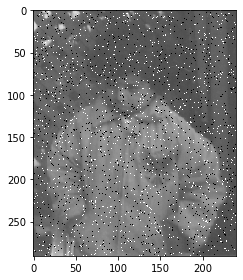

In [6]:
img = io.imread('pout.tif')
gray_img = rgb2gray(img)# this returns a float64 1 channel image
gray_noisy_img = random_noise(gray_img, mode = 's&p', amount = 0.05) 
io.imshow(gray_noisy_img)
io.show()

'''
(1) Averaging Filter
'''

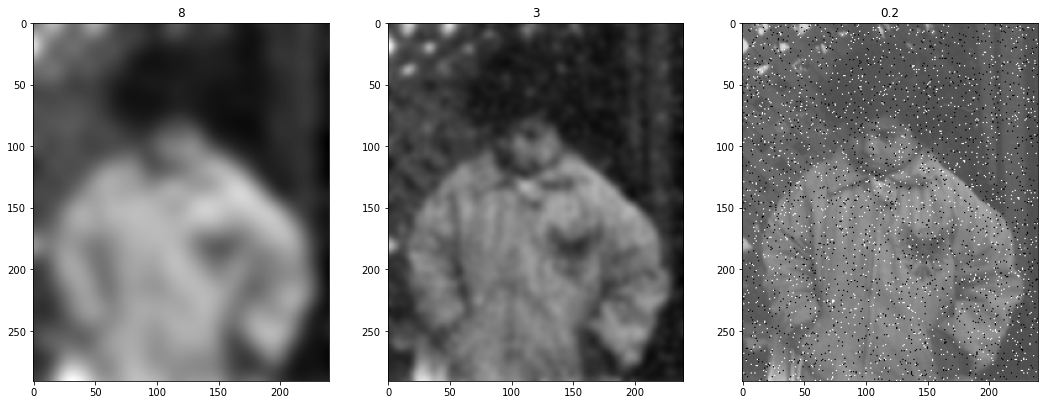

In [7]:
sigmas = [8, 3, 0.2]
filtered_imgs = []
for sigma in sigmas:
    filtered_imgs.append(filters.gaussian(gray_noisy_img, sigma = sigma, mode = 'nearest'))
show_images(filtered_imgs, sigmas)

# higher sigma values:
<h3>remove the details(high bluring), the pixel is much affected by its neigbours</h3>

# small sigma values:
<h3>do not affect the image(does not remove the noise), as the pixel value is the far more important
than neighbours.</h3>

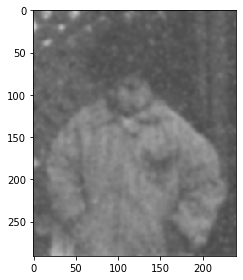

In [8]:
best_sigma = 2
best_output = filters.gaussian(gray_noisy_img, sigma = best_sigma, mode = 'nearest')
io.imshow(best_output)
io.show()

# Do not remove much details + bllur the high frequency noise.

'''
(2) Median Filter
'''

In [9]:
def median(img, window_width = 3, window_height = 3):
    edgex = math.floor(window_width / 2)
    edgey = math.floor(window_height / 2)
    window = np.zeros([window_width, window_height])
    filtered_img = img.copy()
    n = 3
    for x in range (edgex, img.shape[0] - edgex):
        for y in range (edgey, img.shape[1] - edgey):
            for fx in range (window_width):
                for fy in range (window_height):
                    window[fx][fy] = img[x + fx - edgex][y + fy - edgey]
            filtered_img[x][y] = np.median(window, axis = None) #window [int(window_width / 2)][int(window_height / 2)]
    return filtered_img

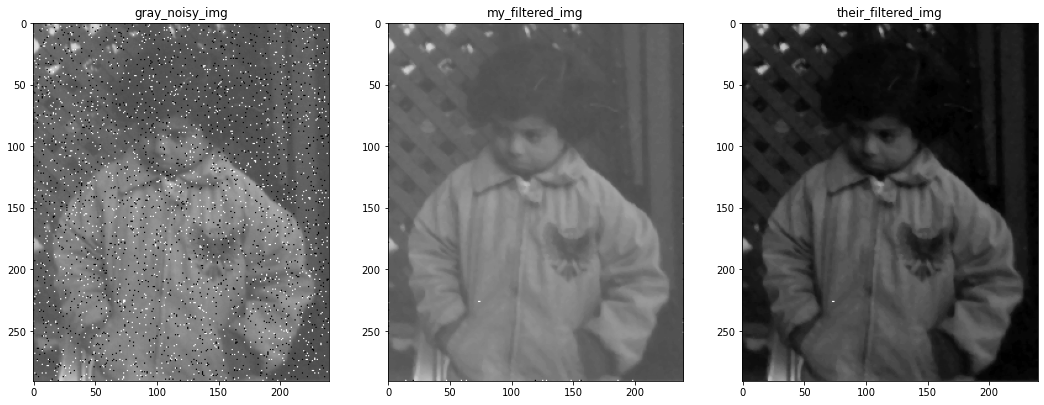

In [10]:
my_filtered_img = median (gray_noisy_img, 3, 3)
their_filtered_img = filters.median(gray_noisy_img, mode = 'nearest')

show_images([gray_noisy_img, my_filtered_img, their_filtered_img], ['gray_noisy_img', 'my_filtered_img', 'their_filtered_img'])


